**ED8 - Classificação por Cores**



Aluno: Mauricio dos Santos de Jesus

1) A partir da imagem 'yellowtargets.png', resolvam os seguintes itens:

a. O objetivo final do exercício é determinar os centróides dos alvos
amarelos;

b. Obter o plano xy de cromaticidade;

c. Utilizar o algoritmo K-means para encontrar os clusters (grupos) de
pontos no plano;

d. Plotar os centros de agrupamento no plano xy de cromaticidade e todos
os pixels da classe dos alvos amarelos (imagem binária);

e. Por fim, determinar os centróides dos alvos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


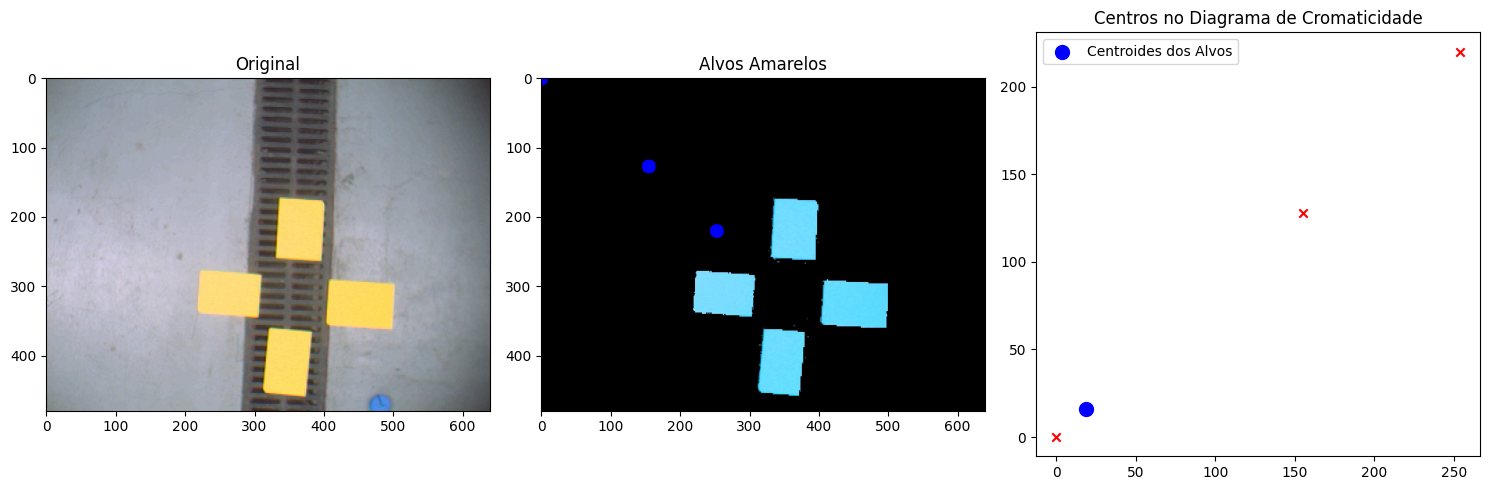

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

def kmeans_clustering(image_path, num_clusters=3):
    # Carrega a imagem e converte para RGB
    img = cv.imread(image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Segmentação dos alvos amarelos
    lower_yellow = np.array([20, 100, 100], dtype=np.uint8)
    upper_yellow = np.array([30, 255, 255], dtype=np.uint8)
    mask = cv.inRange(cv.cvtColor(img, cv.COLOR_RGB2HSV), lower_yellow, upper_yellow)
    yellow_targets = cv.bitwise_and(img, img, mask=mask)

    # Redimensiona a imagem para a forma adequada para o KMeans
    targets = yellow_targets.reshape(-1, 3)

    # Aplica o algoritmo KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(targets)
    centers = kmeans.cluster_centers_

    # Calcula os centróides dos alvos
    centroids = np.mean(targets, axis=0)

    return img, yellow_targets, centers, centroids

def plot_images(img, kmeans_img, centers, centroids):
    # Plotagem das imagens
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img)
    axs[0].set_title("Original")

    axs[1].imshow(kmeans_img)
    axs[1].set_title("Alvos Amarelos")

    axs[2].scatter(centers[:, 0], centers[:, 1], c='r', marker='x')
    axs[2].scatter(centroids[0], centroids[1], c='b', marker='o', s=100, label='Centroides dos Alvos')
    axs[2].set_title("Centros no Diagrama de Cromaticidade")
    axs[2].legend()

    plt.tight_layout()
    plt.show()

def main():
    # Caminho da imagem
    image_path = "/content/yellowtargets.png"

    # Etapa 1: Aplicar K-Means aos alvos amarelos na imagem
    img, yellow_targets, centers, centroids = kmeans_clustering(image_path)

    # Etapa 2: Converter a imagem K-Means de RGB para BGR para plotagem correta
    kmeans_img = cv.cvtColor(yellow_targets, cv.COLOR_RGB2BGR)

    # Etapa 3: Desenhar círculos nos centros encontrados na imagem K-Means
    for i, center in enumerate(centers):
        kmeans_img = cv.circle(kmeans_img, (int(center[0]), int(center[1])), 10, (0, 0, 255), -1)

    # Etapa 4: Plotar as imagens e os resultados
    plot_images(img, kmeans_img, centers, centroids)

if __name__ == "__main__":
    main()
